In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.graph_objects as go
import plotly.express as px

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
    

ModuleNotFoundError: No module named 'folium'

In [41]:
df = pd.read_csv("ca-dealers-used.csv",sep = ',', dtype={'fuel_type': 'object', 'engine_block': 'object'})

In [42]:
df.dtypes

id               object
vin              object
price           float64
miles           float64
stock_no         object
year            float64
make             object
model            object
trim             object
body_type        object
vehicle_type     object
drivetrain       object
transmission     object
fuel_type        object
engine_size     float64
engine_block     object
seller_name      object
street           object
city             object
state            object
zip              object
dtype: object

In [43]:
df.head(5)

,id,vin,price,miles,stock_no,year,make,model,trim,body_type,...,drivetrain,transmission,fuel_type,engine_size,engine_block,seller_name,street,city,state,zip
0,b39ea795-eca9,19UNC1B01HY800062,179999.0,9966.0,V-P4139,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,edmundston honda,475 Rue Victoria,Edmundston,NB,E3V 2K7
1,026cb5b1-6e3e,19UNC1B02HY800023,179995.0,5988.0,PPAP70374,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,garage daniel lessard,2795 Route-du-prsident-kennedy,Notre-dame-des-pins,QC,G0M 1K0
2,5cd5d5b2-5cc2,19UNC1B02HY800071,168528.0,24242.0,B21085,2017.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,lougheed acura,1388 Lougheed Highway,Coquitlam,BC,V3K 6S4
3,b32473ed-5922,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,drive autogroup,1305 Parkway Suite 600,Pickering,ON,L1V 3P2
4,ac40c9fc-0676,19UNC1B02LY800001,220000.0,6637.0,AP5333,2020.0,Acura,NSX,Base,Coupe,...,4WD,Automatic,Electric / Premium Unleaded,3.5,V,acura pickering,575 Kingston Road,Pickering,ON,L1V 3N7


In [44]:
df=df[df.state == "ON"]

In [45]:
df=df[df.city == "Toronto"]

In [46]:
len(df)

14998

In [47]:
drop_columns = ['id', 'vin', 'stock_no', 'seller_name', 'street', 'city', 'state','zip']

In [48]:
df = df.drop(columns = drop_columns)

In [49]:
missing_values_count = df.isnull().sum()
missing_values_count

price           1187
miles           1769
year               0
make               0
model            191
trim            1044
body_type       1556
vehicle_type    1720
drivetrain       736
transmission     722
fuel_type       2383
engine_size     2391
engine_block    2444
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 39 to 393573
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13811 non-null  float64
 1   miles         13229 non-null  float64
 2   year          14998 non-null  float64
 3   make          14998 non-null  object 
 4   model         14807 non-null  object 
 5   trim          13954 non-null  object 
 6   body_type     13442 non-null  object 
 7   vehicle_type  13278 non-null  object 
 8   drivetrain    14262 non-null  object 
 9   transmission  14276 non-null  object 
 10  fuel_type     12615 non-null  object 
 11  engine_size   12607 non-null  float64
 12  engine_block  12554 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.6+ MB


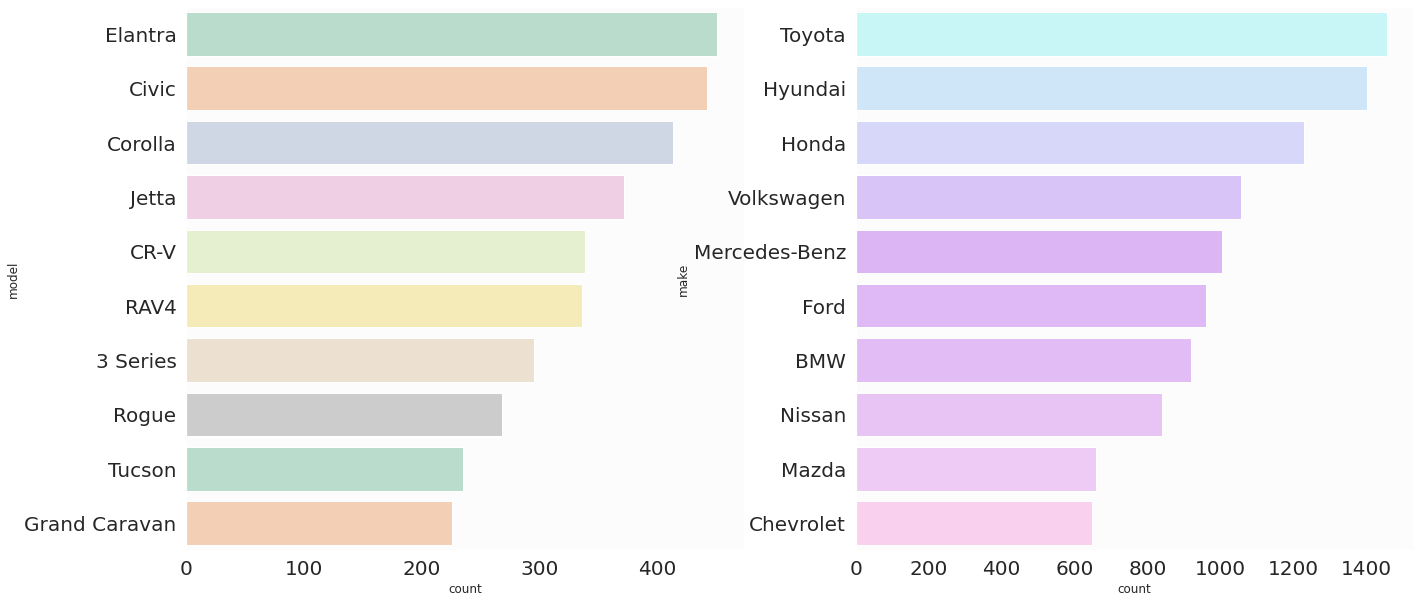

In [56]:
colors = ["#C0FDFF", "#C8E7FF","#D0D1FF","#D8BBFF","#DEAAFF","#E2AFFF","#E5B3FE","#ECBCFD","#F3C4FB","#FFCBF2"]
sns.set_palette(sns.color_palette(colors))


fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='make',data = df,order=df.make.value_counts().iloc[:10].index, ax = ax[1],palette = colors) 
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

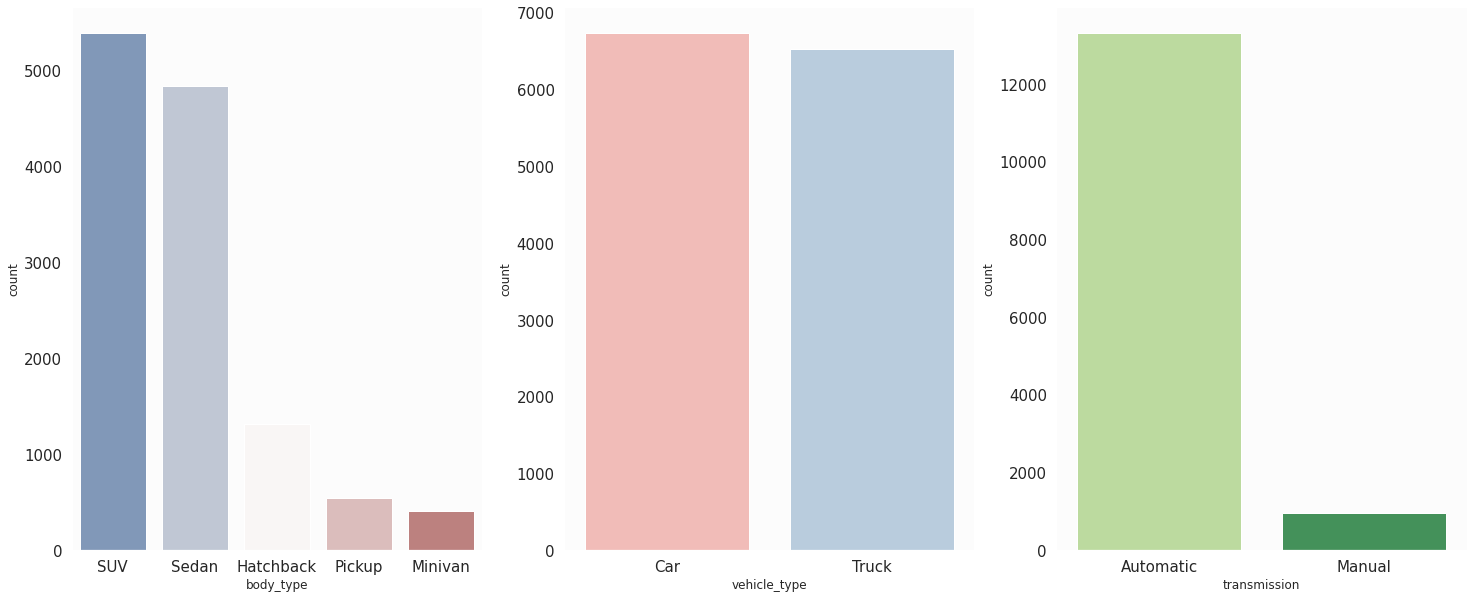

In [59]:
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='body_type',data = df,order=df.body_type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='vehicle_type',data = df,order=df.vehicle_type.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

In [62]:
df['price'].describe()

count     13811.000000
mean      25069.024835
std       21359.905212
min           0.000000
25%       14855.500000
50%       20900.000000
75%       29950.000000
max      589000.000000
Name: price, dtype: float64

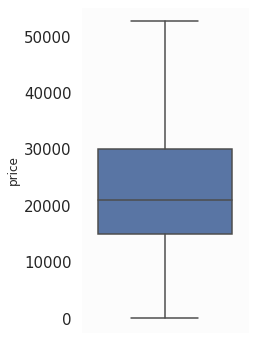

In [70]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df, showfliers=False)

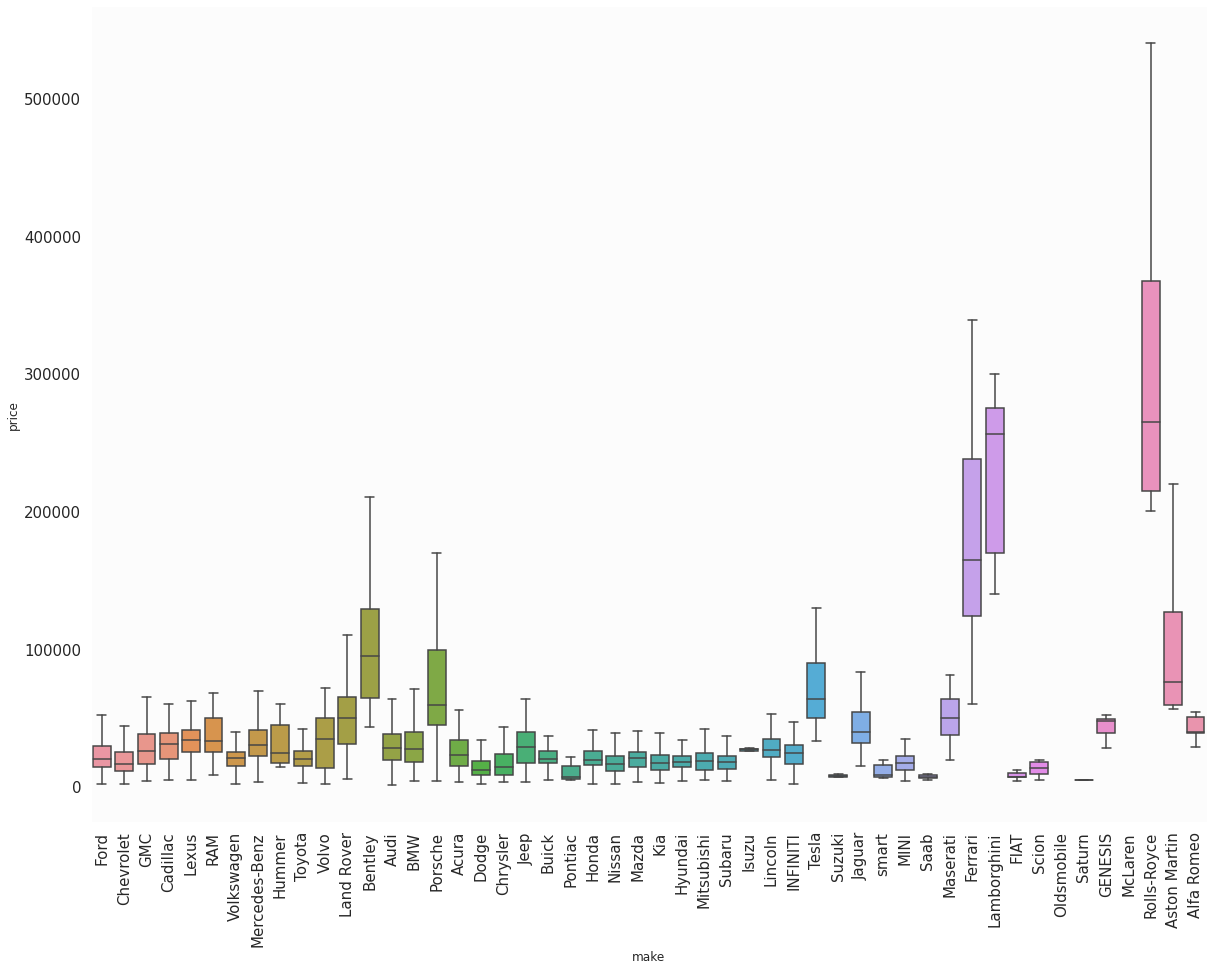

In [72]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.boxplot(y='price', x='make', data=df, showfliers=False)

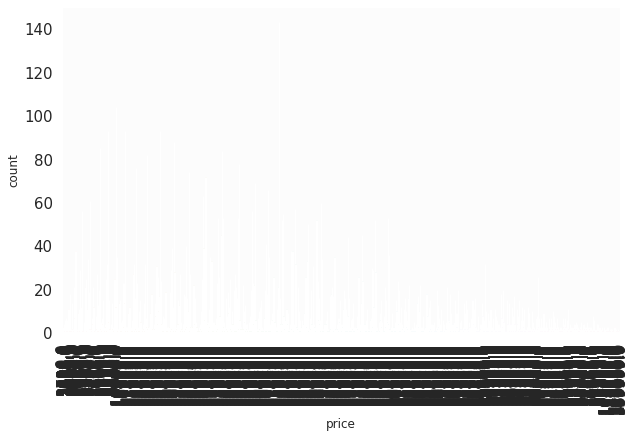

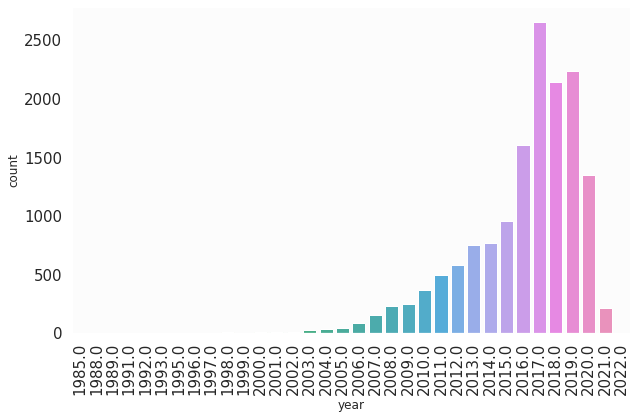

In [81]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='year', data=df)

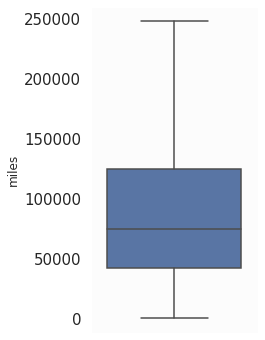

In [87]:
plt.figure(figsize=(3,6))
sns.boxplot(y='miles', data=df, showfliers=False)